# ACCESS-OM2 1$^\circ$ Comparison

This notebook compares our first pre-release of ACCESS-OM2 with our (hopefully final) ACCESS-OM2 Pre-release, implemented at 1°.


## Current Status


|** Run Name** | **Forcing** | ** Run ** | ** Status **|
|--------------|---------|-------------------------------------------------|-------------|
|1deg_jra55_ryf_spinup8 | JRA55 V1.1 RYF9091| Same as spinup7, but update to Nic's new executable where we **think** the melt flux is now handled correctly. Turned Red Sea fix back on after year 4. This is running smoothly, but I can't get the timestep beyond 2160 (we are hoping for 3600).  | Stopped after 300 years. | 
|1deg_jra55v13_ryf9091_spinup_A | JRA55 V1.3 RYF9091|  Following spinup8, but with a number of minor changes including updating the JRA forcing to v1.3, input.nml fixes, changes to Bering Strait and Red Sea topography, a more complete diag_table etc. Timestep up to 3600 and model seems stable.| At year 40.| 

### Notes


**Last updated 4 November 2017**

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
cc.build_index()

Finding runs on disk...found 2660 run directories
Using database sqlite:////g/data1/v45/cosima-cookbook/cosima-cookbook.db
Querying database...runs already indexed: 2804
11 new run directories found including...
/g/data3/hh5/tmp/cosima/mom01v5/KDS75_WOA13/output008
/g/data3/hh5/tmp/cosima/mom01v5/KDS75_WOA13/output000
/g/data3/hh5/tmp/cosima/mom01v5/KDS75_WOA13/output006
...
Finding files on disk...


HBox(children=(IntProgress(value=0, max=11), HTML(value='')))


Files found but not yet indexed: 0
Indexing new .nc files...
[########################################] | 100% Completed |  0.1s
Found 0 new variables
Saving results in database...
Indexing complete.


True

## Experiments

In [3]:
# This subset of cases are the important ones
esub = ['1deg_jra55_ryf_spinup8',
 '1deg_jra55v13_ryf9091_spinup_A',
       ]

## Wind Stress
Just a simple plot showing zonally averaged zonal wind stress from each case.

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

/home/157/amh157/cosima-cookbook/cosima_cookbook/netcdf_index.py:269: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  decoded_time = xr.conventions.decode_cf_datetime(dataarray.time, time_units)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


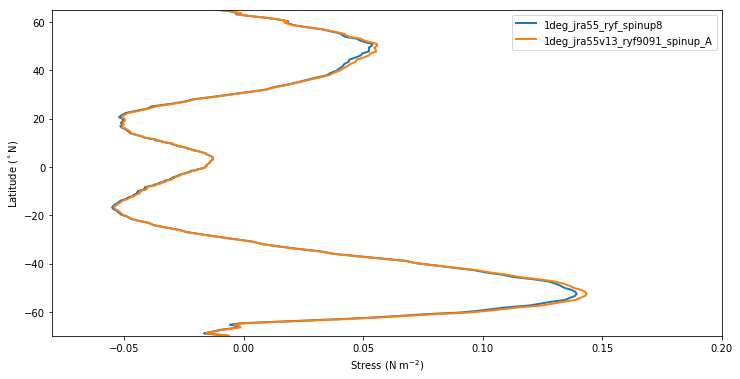

In [5]:
cc.plots.wind_stress(esub)

## Ocean Scalars
The following series of plots shows global timeseries of key metrics.

In [6]:
# If you want to clear stuff
# cc.diagnostics.annual_scalar.clear()

HBox(children=(IntProgress(value=0, description='variables: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

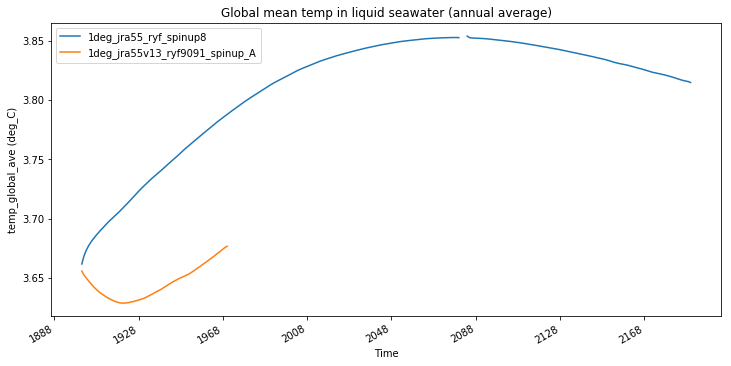

In [6]:
cc.plots.annual_scalar(esub, 'temp_global_ave')

HBox(children=(IntProgress(value=0, description='variables: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

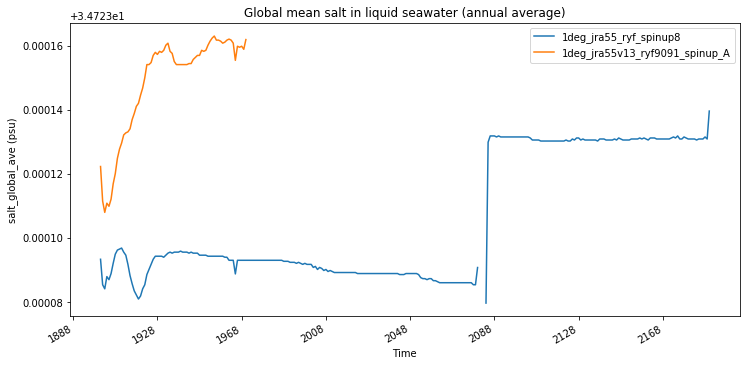

In [7]:
cc.plots.annual_scalar(esub, 'salt_global_ave')

HBox(children=(IntProgress(value=0, description='variables: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

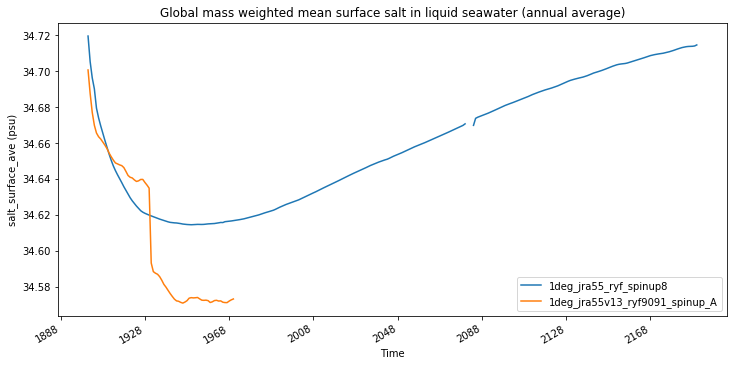

In [8]:
cc.plots.annual_scalar(esub, 'salt_surface_ave')

HBox(children=(IntProgress(value=0, description='variables: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

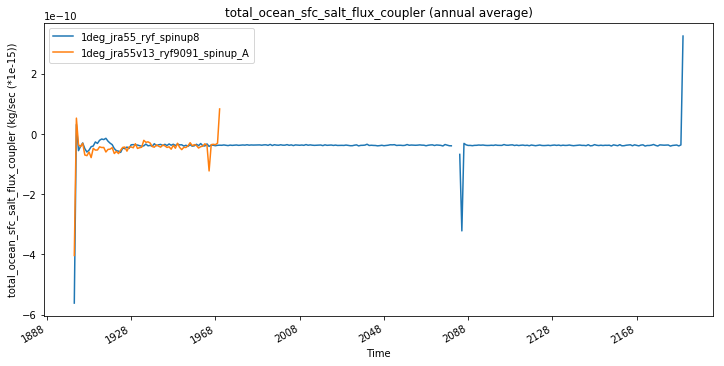

In [9]:
cc.plots.annual_scalar(esub, 'total_ocean_sfc_salt_flux_coupler')

HBox(children=(IntProgress(value=0, description='variables: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

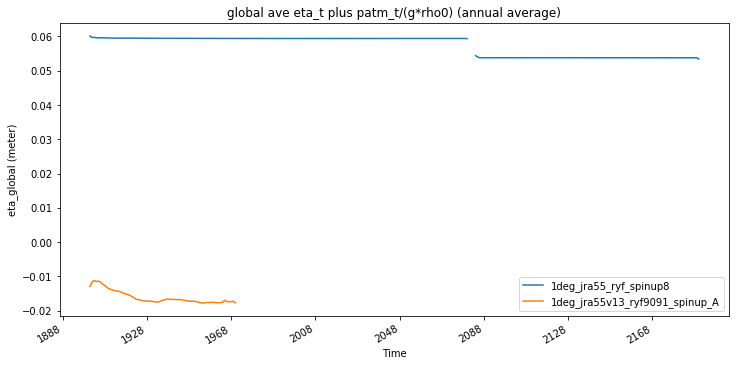

In [10]:
cc.plots.annual_scalar(esub, 'eta_global')

# Drake Passage Transport

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

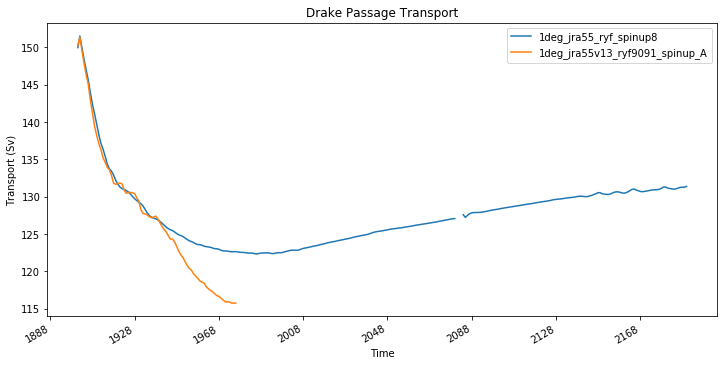

In [4]:
cc.plots.drake_passage(esub)

# Meridional Overturning Circulation

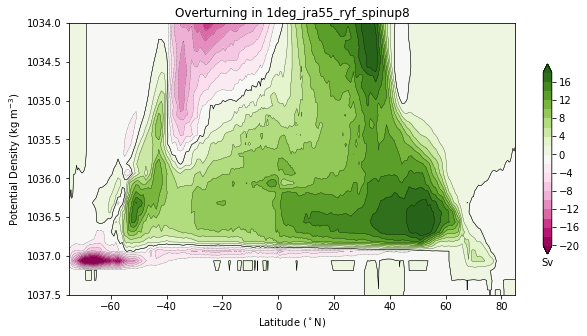

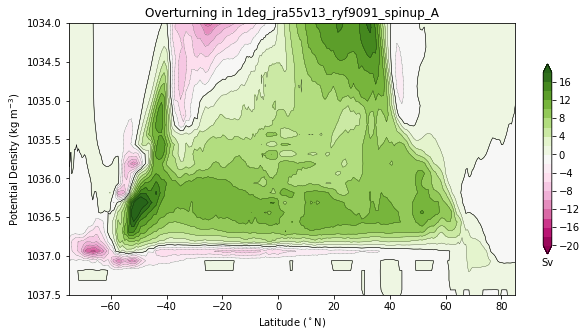

In [33]:
for e in esub: 
    cc.plots.psi_avg(e,10,GM=True)

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

Calculating 1deg_jra55_ryf_spinup8 timeseries of AABW transport at 55S 
Calculating 1deg_jra55v13_ryf9091_spinup_A timeseries of AABW transport at 55S 


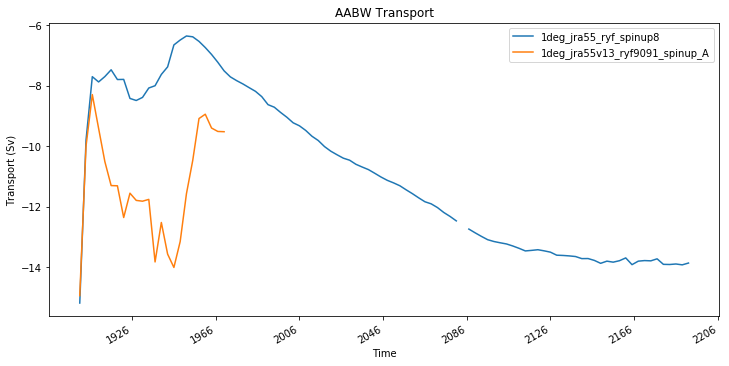

In [34]:
cc.plots.aabw(esub, GM=True)

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

Calculating 1deg_jra55_ryf_spinup8 timeseries of AMOC transport at 26N 
Calculating 1deg_jra55v13_ryf9091_spinup_A timeseries of AMOC transport at 26N 


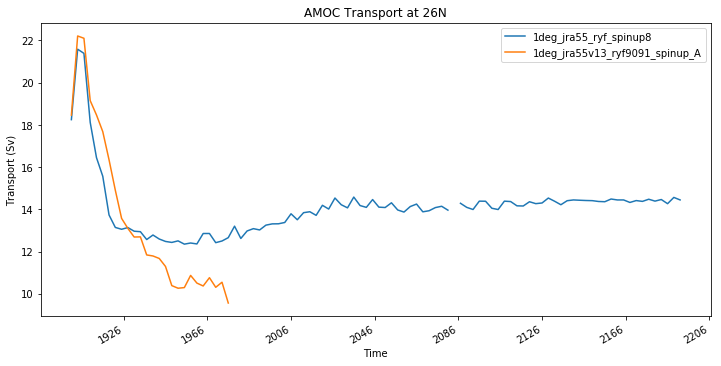

In [6]:
cc.plots.amoc(esub, GM=True)

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

Calculating 1deg_jra55_ryf_spinup8 timeseries of AMOC transport at 35S 
Calculating 1deg_jra55v13_ryf9091_spinup_A timeseries of AMOC transport at 35S 


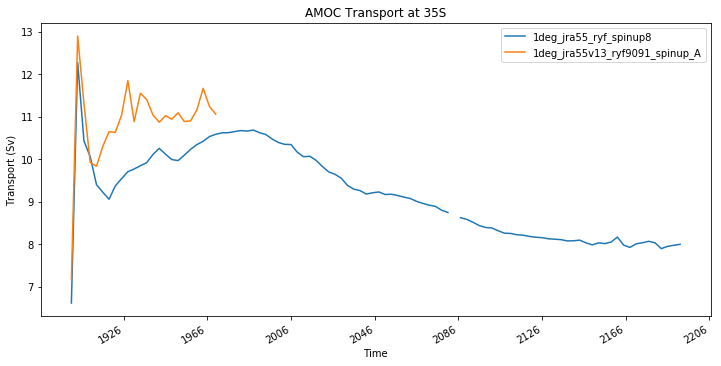

In [41]:
cc.plots.amoc_south(esub, GM=True)

# Sea Surface Temperature
LH column shows SST, RH column shows difference from Year 1.

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


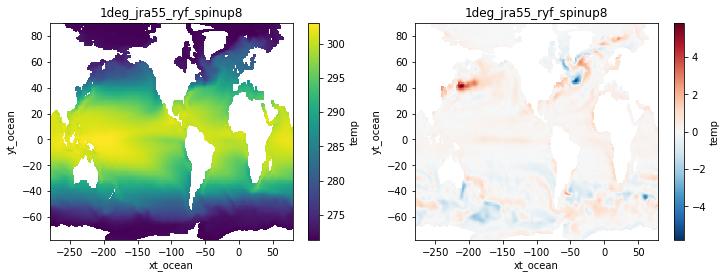

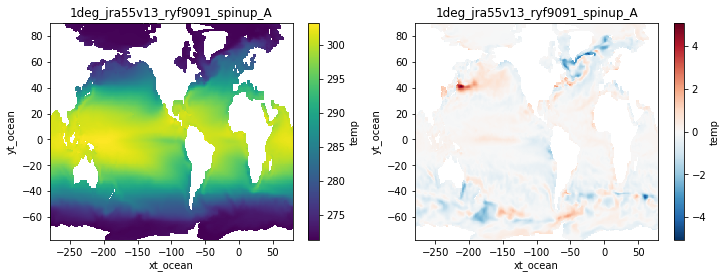

In [42]:
cc.plots.sea_surface_temperature(esub)

In [ ]:
reftemp = cc.get_nc_variable('10', 'woa13_ts_12_mom10.nc', 'temp',time_units = 'days since 1900-01-01').isel(ZT=0)

In [ ]:
reftemp

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


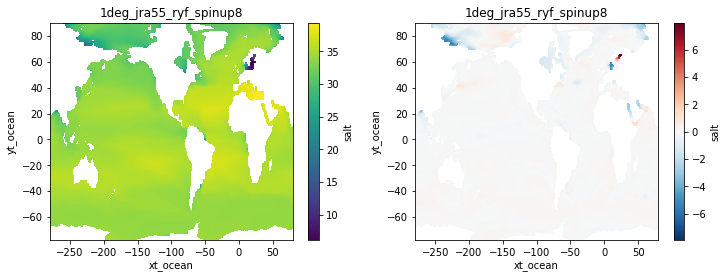

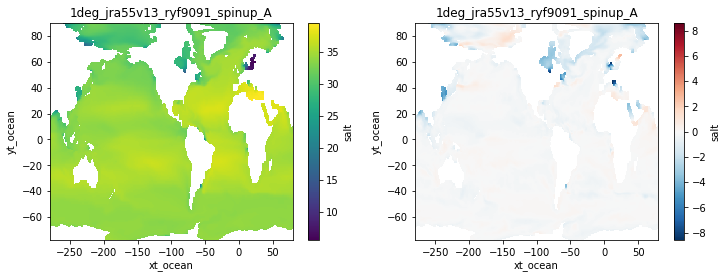

In [43]:
cc.plots.sea_surface_salinity(esub)

# Zonal Mean transects

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


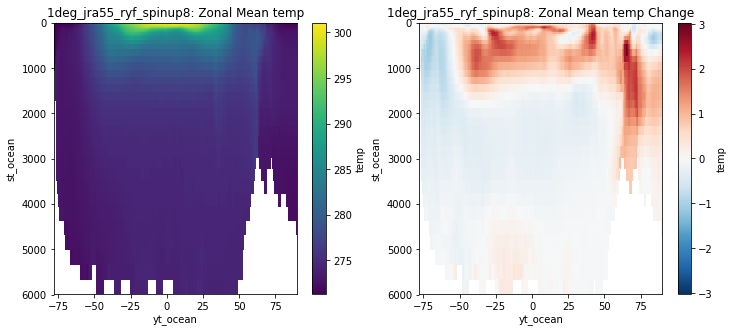

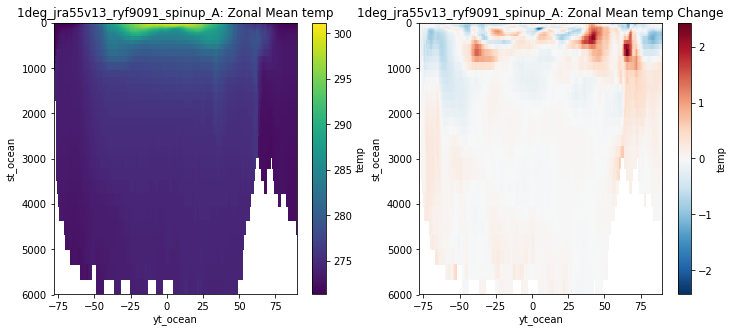

In [44]:
cc.plots.zonal_mean(esub[:2],'temp',n=10)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


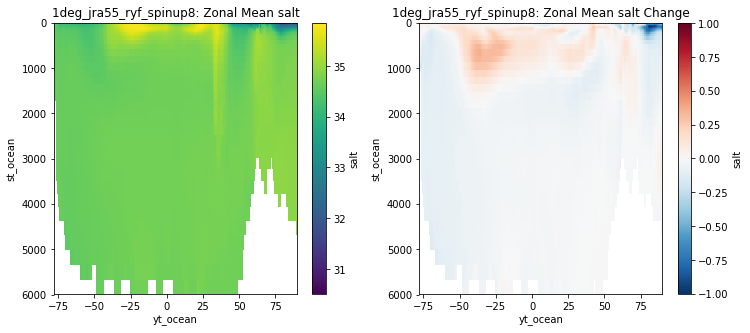

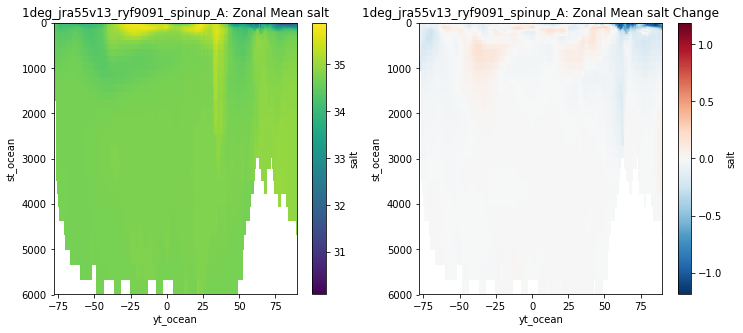

In [45]:
cc.plots.zonal_mean(esub[:2],'salt',n=10)

# Bering Strait

Our latest run has a wider Bering Strait. How does it alter the flow there?

Plots below show that velocity has halved (hence improved model stability) but that the net transport is similar.

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


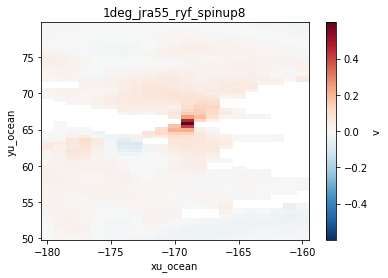

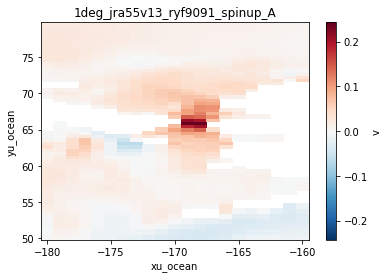

In [27]:
for e in esub:
    vsurf = cc.get_nc_variable(e, 'ocean.nc', 'v',time_units = 'days since 1900-01-01',n=20)\
                        .isel(st_ocean=0).sel(xu_ocean=slice(-180,-160)).sel(yu_ocean=slice(50,80)).mean('time')
    plt.figure()
    vsurf.plot()
    plt.title(e)

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

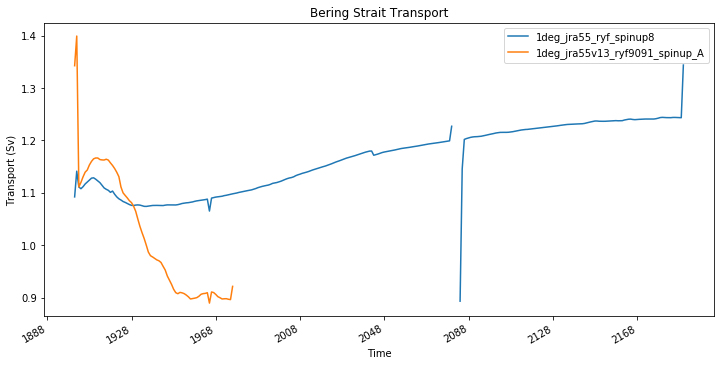

In [5]:
cc.plots.bering_strait(esub)

# Red Sea

We also widened Red Sea and Persian Gulf mouths in the hope of avoiding the redseagulfbayfix setting. It didn't work, and we had to switch it back on, leading to slightly lower salinity in the Red Sea overall.

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


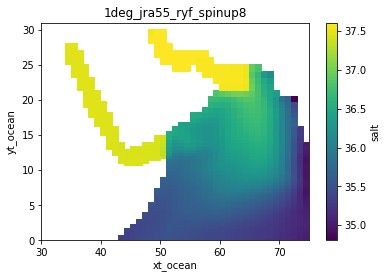

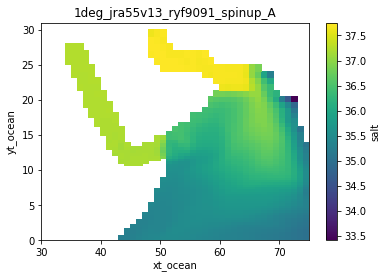

In [40]:
for e in esub:
    saltsurf = cc.get_nc_variable(e, 'ocean.nc', 'salt',time_units = 'days since 1900-01-01',n=20)\
                        .isel(st_ocean=0).sel(xt_ocean=slice(30,75)).sel(yt_ocean=slice(0,31)).mean('time')
    plt.figure()
    saltsurf.plot()
    plt.title(e)